<a href="https://colab.research.google.com/github/lpagliano/coderh/blob/main/After_Regresion_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Empezamos con los primeros modelos en Machine Learning.
Al haber una fuerte correlación lineal entre las variables temperatura y humedad, se toma la temperatura de la estación Alicia como target y se toman las variables  de humedad y temperatura de estaciones vecinas como Features




## **Regresión Lineal**

In [ ]:
# importo librerias necesarias
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Regresion-Lineal-/main/base_datos_estaciones_met_V3_train.csv'
df = pd.read_csv(url, sep=",")
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [ ]:
x= df[[ 'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 'Humedad_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'Temp_ San Miguel - Las Varillas', 'Humedad_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]


In [ ]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Un pipeline es una forma conveniente de encadenar múltiples pasos de preprocesamiento y modelado en un flujo de trabajo coherente. Un pipeline permite especificar y ejecutar secuencialmente una serie de transformaciones en los datos, seguidas de un estimador final.

In [ ]:

# revisar https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

model = Pipeline([
    ('scaler', StandardScaler()), #escalar significa estandarizar
    ('features', PolynomialFeatures(degree=1)), #regresion lineal
    ('regression', LinearRegression(fit_intercept=True)) #tipo de regresion
])

# Entrenar el modelo
model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lineal = model.predict(x_test)


In [ ]:
# Calcular el error cuadrático medio

mse_train = mean_squared_error(y_train, model.predict(x_train))
print('Error Cuadrático Medio en entrenamiento:', round(mse_train,2))


mse_test = mean_squared_error(y_test, model.predict(x_test))
print('Error Cuadrático Medio en testeo:', round(mse_test,2))

Error Cuadrático Medio en entrenamiento: 0.63
Error Cuadrático Medio en testeo: 0.66


# Probemos ahora otro algoritmo k-Nearest Neighbors (KNN)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = Pipeline([
    ('regression', KNeighborsRegressor(n_neighbors=5))
])

# Entrenar el modelo
model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_knn_SinEstandarizado = model.predict(x_test)


In [ ]:
# Calcular el error cuadrático medio

mse_train = mean_squared_error(y_train, model.predict(x_train))
print('Error Cuadrático Medio en entrenamiento:', round(mse_train,2))


mse_test = mean_squared_error(y_test, model.predict(x_test))
print('Error Cuadrático Medio en testeo:', round(mse_test,2))

Error Cuadrático Medio en entrenamiento: 0.28
Error Cuadrático Medio en testeo: 0.46


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', KNeighborsRegressor(n_neighbors=5))
])

# Entrenar el modelo
model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_knn_Estandarizado = model.predict(x_test)


In [ ]:
# Calcular el error cuadrático medio

mse_train = mean_squared_error(y_train, model.predict(x_train))
print('Error Cuadrático Medio en entrenamiento:', round(mse_train,2))


mse_test = mean_squared_error(y_test, model.predict(x_test))
print('Error Cuadrático Medio en testeo:', round(mse_test,2))

Error Cuadrático Medio en entrenamiento: 0.19
Error Cuadrático Medio en testeo: 0.31


Cálculo de distancias: A diferencia de los algoritmos basados en distancias, como el k-Nearest Neighbors (k-NN) o el SVM, la regresión lineal no realiza cálculos de distancias directamente en los datos. Por lo tanto, las diferencias en la escala de las características no tienen un impacto directo en las predicciones de la regresión lineal.

Aunque la regresión lineal puede ser menos sensible a la escala de las características, eso no significa que la estandarización sea innecesaria en todos los casos. La estandarización puede tener beneficios en términos de interpretabilidad, comparabilidad entre características y estabilidad numérica. Además, si se combinan características de diferentes escalas en la regresión lineal, la estandarización puede ayudar a evitar que una característica domine sobre las demás debido a su escala

Queda demostrado que estimar la temperatura en una estación a partir de datos de temperatura y humedad de estaciones vecinas, es suficiente para tener un "error bajo". Sin embargo, en testeo usando regresión lineal se obtubo un MSE de 0.66 y en KNN de 0.31 es más del 50%. Lo que puede significar mejoras importantes al detectar variaciones de temperaturas debido al cambio climático

Aunque pueda parecer poco, medio grado centígrado más de temperatura global tendría unos efectos enormes sobre nuestro planeta.

Por ejemplo, si la temperatura aumenta 2 °C, el hielo del ártico desaparecerá por completo en uno de cada diez veranos, y no en uno de cada cien como pasaría con un aumento del 1,5 °C. Estimar con la mayor precisión posible la temperatura hace que se pueda monitorear y llegar a conclusiones certeras si hay un aumento o no de la temperatura  

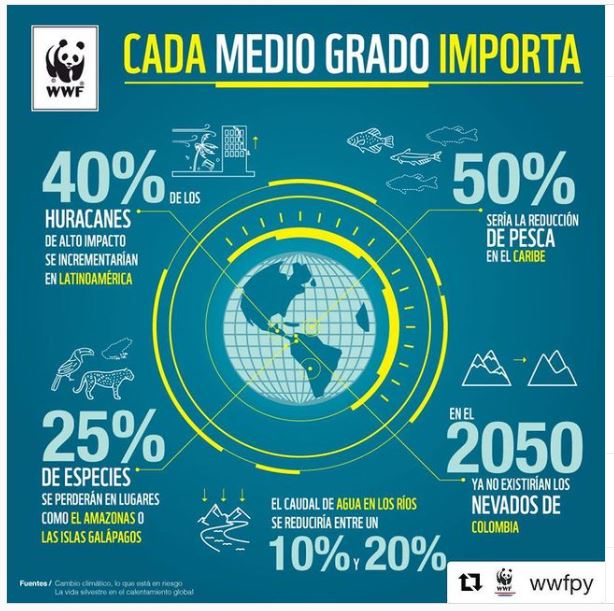

# ¿Qué pasaría si usáramos PCA?

In [ ]:

# importamos el método que permite utilizar el análisis de componentes principales o PCA
from sklearn.decomposition import PCA

In [ ]:
# Estandarizar los datos siempre al usar PCA si tenemos variables de diferentes naturaleza
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[-1.76545906,  1.15287079, -1.69945666, ...,  1.03823775,
        -1.52883592,  1.15580862],
       [-0.3736868 ,  0.69090512, -0.31752625, ...,  0.54680058,
        -0.34227773,  0.49537266],
       [-0.32213967,  0.10475513,  0.01952995, ..., -0.13753717,
        -0.35853195,  0.20842462],
       ...,
       [ 1.37891531, -0.79433935,  1.38460755, ..., -1.03314697,
         1.49444934, -0.89837496],
       [-0.33932205, -0.48139486, -0.35123187, ..., -0.321252  ,
        -0.35853195, -0.4019093 ],
       [-0.28777493,  0.99391486, -0.41864311, ...,  0.78103699,
        -0.19598973,  0.60013147]])

In [ ]:
# Creamos la instancia del modelo
modelo_pca = PCA(n_components=8)

# Entrenamos el modelo con nuestros datos
modelo_pca.fit(X_scaled)

PCA(n_components=8)

In [ ]:
# Empecemos por los componentes
# para esto usamos .components_
# vamos a guardar esta información en un dataframe, para poderlo ver más facilmente
lista_componentes = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
componentes = pd.DataFrame(data=modelo_pca.components_, columns = x.columns, index=lista_componentes)
componentes

,Temp_Las Varas AgriculturaCba,Humedad_Las Varas AgriculturaCba,Temp_San Miguel - Establecimiento Don Luis,Humedad_San Miguel - Establecimiento Don Luis,Temp_San Miguel - Listello,Humedad_San Miguel - Listello,Temp_ San Miguel - Las Varillas,Humedad_ San Miguel - Las Varillas
PC1,0.354838,-0.350960,0.353910,-0.350647,0.355112,-0.355129,0.352641,-0.355156
PC2,-0.349396,-0.382626,-0.343041,-0.364308,-0.341785,-0.335207,-0.375757,-0.332788
PC3,0.217436,-0.363196,-0.473373,0.708874,0.129440,-0.208379,0.111142,-0.147297
PC4,0.382105,-0.598916,0.040101,-0.148016,-0.002111,0.299849,-0.353193,0.507070
PC5,-0.071554,0.234019,-0.053459,-0.013322,0.640721,-0.455074,-0.507405,0.249007
PC6,0.032457,0.065190,-0.514823,-0.308877,0.468606,0.562575,0.021623,-0.312567
PC7,-0.063063,0.020277,-0.456569,-0.318870,-0.036203,-0.273034,0.547200,0.556949
PC8,0.740662,0.424720,-0.234575,-0.150514,-0.329989,-0.173374,-0.199994,-0.120018


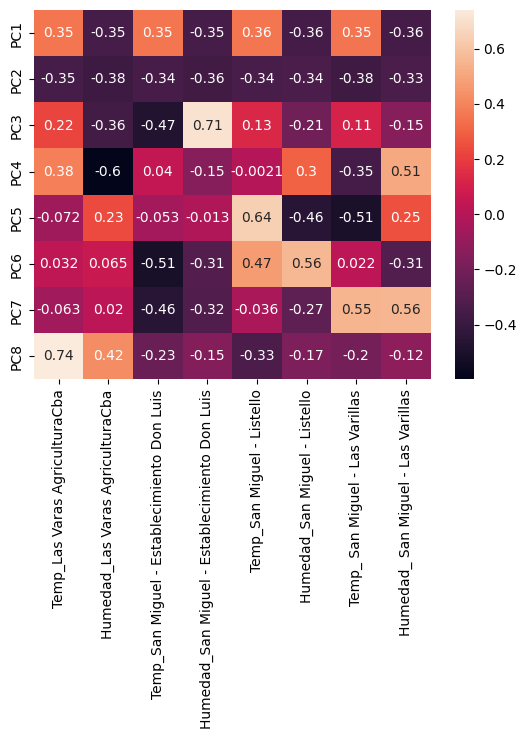

In [ ]:
import seaborn as sns
ax = sns.heatmap(componentes, annot=True)

In [ ]:
# Veamos la varianza explicada de cada componente
# para eso utilizamos .explained_variance_ratio_
print(lista_componentes)
print(modelo_pca.explained_variance_ratio_.round(3))

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
[0.924 0.063 0.005 0.003 0.002 0.001 0.001 0.   ]


In [ ]:
proyecciones = pd.DataFrame(modelo_pca.transform(x), index=x.index,columns=lista_componentes) #aplicamos pca sobre el data set original
proyecciones

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-120.849363,-153.988030,-0.616558,8.646730,0.964348,0.062356,0.172105,-2.852790
1,-92.600540,-148.887067,-2.007257,6.361908,1.324404,2.355014,-1.710692,-1.682811
2,-76.297310,-133.532600,-2.965793,7.730239,3.404550,-2.563658,1.378804,-1.590078
3,-114.662984,-156.248701,-1.795247,10.032997,0.456257,2.751017,-1.616961,-3.115910
4,-116.015012,-164.602446,-2.564133,6.743206,1.385027,-1.231216,-1.321658,-1.901395
...,...,...,...,...,...,...,...,...
10363,-106.155381,-166.215282,-1.276381,9.040786,1.835568,1.485503,0.049166,-2.427269
10364,-100.649012,-148.807887,0.596145,13.836040,-0.312021,2.004265,-1.352825,-4.682225
10365,-36.656324,-121.282292,3.636327,2.210601,0.989747,-2.858462,-1.845538,-1.021562
10366,-64.263123,-120.228429,0.545984,7.652513,-0.276148,2.054322,-2.137875,-3.062644


In [ ]:
proyecciones_finales = pd.concat([proyecciones["PC1"], proyecciones["PC2"]], axis=1)
proyecciones_finales

,PC1,PC2
0,-120.849363,-153.988030
1,-92.600540,-148.887067
2,-76.297310,-133.532600
3,-114.662984,-156.248701
4,-116.015012,-164.602446
...,...,...
10363,-106.155381,-166.215282
10364,-100.649012,-148.807887
10365,-36.656324,-121.282292
10366,-64.263123,-120.228429


In [ ]:
x=proyecciones_finales

In [ ]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



model = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', KNeighborsRegressor(n_neighbors=5))
])

# Entrenar el modelo
model.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_PCA = model.predict(x_test)

In [ ]:
# Calcular el error cuadrático medio

mse_train = mean_squared_error(y_train, model.predict(x_train))
print('Error Cuadrático Medio en entrenamiento:', round(mse_train,2))


mse_test = mean_squared_error(y_test, model.predict(x_test))
print('Error Cuadrático Medio en testeo:', round(mse_test,2))

Error Cuadrático Medio en entrenamiento: 0.45
Error Cuadrático Medio en testeo: 0.71


Al comparar los errores sin aplicar PCA usando el mismo algortimo se obtuvo:

Error Cuadrático Medio en entrenamiento: 0.19

Error Cuadrático Medio en testeo: 0.31

Es esperable que al usar PCA perdamos rendimiento en nuestro modelo, ya que se pierde varianza. Sin embargo, hay otras mejoras considerables como reducción del tiempo al ejecutar los algoritmos (algo no menor cuando estamos usando datos masivos).

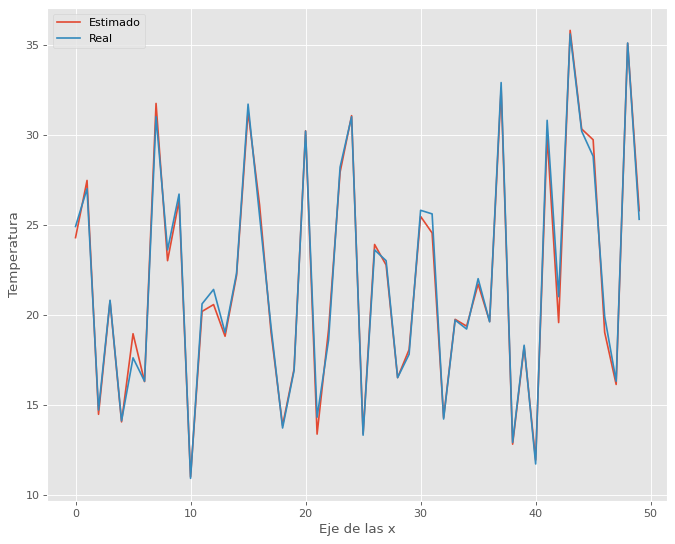

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

pyplot.style.use('ggplot')
figure(figsize=(10, 8), dpi=80)


pyplot.plot(y_pred_knn_Estandarizado[:50]) #nuestro mejor modelo (tiene el menor MSE)
pyplot.plot(np.array(y_test[:50]))

plt.legend(['Estimado','Real'])
plt.xlabel('Eje de las x')
plt.ylabel('Temperatura')
plt.show()